# 畳み込み

## 3次元の画像とは
例として、普通の画像をRGBの3層に分割してみます

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [55]:
# img = Image.open('../images/sweet_ogura_spa.jpg')
img = Image.open('../images/好きな画像')

In [58]:
img_array = np.array(img)
img_array

array([[[ 39,  41,  53],
        [ 35,  37,  49],
        [ 26,  25,  39],
        ...,
        [121,  99,  60],
        [128, 106,  67],
        [130, 108,  69]],

       [[ 29,  31,  43],
        [ 23,  25,  37],
        [ 17,  16,  30],
        ...,
        [140, 118,  79],
        [141, 119,  80],
        [141, 119,  80]],

       [[ 34,  36,  48],
        [ 10,  12,  24],
        [ 32,  32,  44],
        ...,
        [144, 122,  83],
        [140, 118,  79],
        [142, 120,  81]],

       ...,

       [[234, 225, 208],
        [235, 226, 209],
        [236, 227, 210],
        ...,
        [235, 224, 206],
        [235, 224, 206],
        [235, 224, 206]],

       [[235, 226, 209],
        [236, 227, 210],
        [237, 228, 213],
        ...,
        [235, 224, 206],
        [235, 224, 206],
        [235, 224, 206]],

       [[236, 227, 210],
        [237, 228, 211],
        [237, 228, 213],
        ...,
        [235, 224, 206],
        [235, 224, 206],
        [235, 224, 206]]

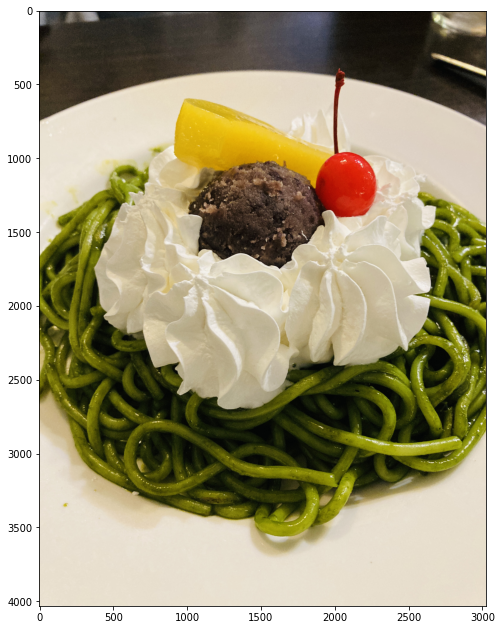

In [76]:
plt.figure(figsize=(8, 12))

# 画像を表示
plt.imshow(img_array)

In [ ]:
# 次元を表示
img_array.shape

(4032, 3024, 3)

最後の3次元にBGRの順で格納されている

色ごとに分解してみよう！

In [86]:
# 分解
# shape = (height, width, channel)
img_R = img_array.copy()
img_R[:, :, (1, 2)] = 0
img_G = img_array.copy()
img_G[:, :, (0, 2)] = 0
img_B = img_array.copy()
img_B[:, :, (0, 1)] = 0

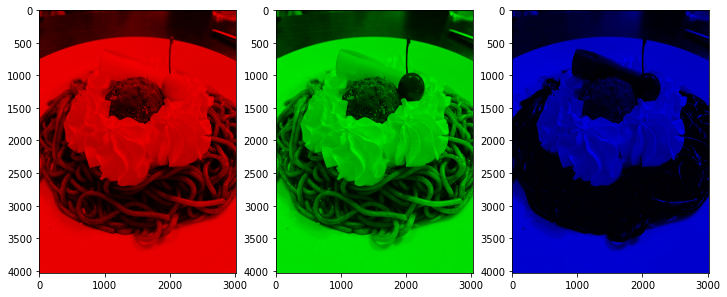

In [87]:
plt.figure(figsize=(12, 30))

# 画像を表示
r_frame = plt.subplot(1, 3, 1)
g_frame = plt.subplot(1, 3, 2)
b_frame = plt.subplot(1, 3, 3)

r_frame.imshow(img_R)
g_frame.imshow(img_G)
b_frame.imshow(img_B)

In [88]:
# im_r = Image.fromarray(img_R)
# im_g = Image.fromarray(img_G)
# im_b = Image.fromarray(img_B)
# im_r.save('../images/sweet_ogura_spa_r.jpg')
# im_g.save('../images/sweet_ogura_spa_g.jpg')
# im_b.save('../images/sweet_ogura_spa_b.jpg')

## 2次元畳み込みから3次元畳み込みへ

In [25]:
def conv2d(A, B):
    """二次元配列A, Bの畳み込みを計算する
    - `scipy.signal.convolve2d`とは異なる実装なので注意が必要
    """
    n = A.shape[0] # 配列Aの次元
    m = B.shape[0] # 配列Bの次元
    k = min(n, m) # 配列Aと配列Bの小さい方の次元
    t = abs(n - m) + 1 # 戻り値の配列の次元

    C = np.zeros((t, t))

    for i in range(t):
        for j in range(t):
            a = A[i:i+k, j:j+k].flatten()
            b = B.flatten()
            C[i, j] = np.dot(a, b)
            
    return C

In [26]:
A1 = np.array(
    [[5, 0, 1],
     [1, 3, 1],
     [2, 4, 0]]
)

A2 = np.array(
    [[7, 3, 1],
     [5, 1, 2],
     [0, 4, 0]]
)

A3 = np.array(
    [[2, 1, 0],
     [1, 0, 2],
     [4, 7, 6]]
)

In [27]:
B1 = np.array(
    [[1, 3],
     [0, 1]]
)

B2 = np.array(
    [[1, 3],
     [0, 2]]
)

B3 = np.array(
    [[2, 1],
     [0, 3]]
)

In [28]:
C1 = conv2d(A1, B1)
C2 = conv2d(A2, B2)
C3 = conv2d(A3, B3)

In [29]:
display(C1)
display(C2)
display(C3)

array([[ 8.,  4.],
       [14.,  6.]])

array([[18., 10.],
       [16.,  7.]])

array([[ 5.,  8.],
       [23., 20.]])

In [32]:
OUT = C1 + C2 + C3
OUT

array([[31., 22.],
       [53., 33.]])